# Data Visualization with Pandas

Installed with
- sudo python3 -mpip install --upgrade numpy    
- sudo python3 -mpip install --upgrade matplotlib
- sudo apt-get install libatlas-base-dev
- sudo python3 -mpip install --upgrade pandas
    
Referenced https://pandas.pydata.org/pandas-docs/stable/visualization.html

Useful Cheat Sheet: http://www.utc.fr/~jlaforet/Suppl/python-cheatsheets.pdf

In [1]:
import PIL
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from time import sleep
#test
plt.figure()
plt.plot([[0,0], [1,1]])
plt.show()

<Figure size 640x480 with 1 Axes>

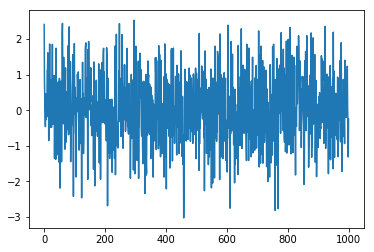

In [4]:
#Series is just a wrapper around plot
#random.randn generates number based on the standard normal distribution (mean = 0, sd = 1)
#The parameter is the number of numbers generated
numseries = pd.Series(np.random.randn(1000))

numseries.plot()
#have to close above plot since index are different
plt.show()

Below shows code for constructing subplots.
Note that the axes returned by plt.subplots has different coordinate systems depending on the row and column numbers

For example, for nrows=2,ncols=2, ax = axes[0,0] would be necessary to point at the top left figure.

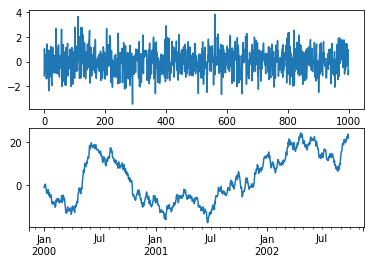

In [5]:
_,axes = plt.subplots(nrows = 2, ncols = 1)

#generating a series of numbers
numseries = pd.Series(np.random.randn(1000))
numseries.plot(ax=axes[0])

#manually setting index according to date
numseries.index = pd.date_range("1/1/2000",periods = 1000)

#cumulative sum
numseries = numseries.cumsum()

numseries.plot(ax = axes[1])

plt.show()

Alternatively you could use plt.subplot(2,1,1) to specifify the top plot. While the specifying the axes is not technically necessary for this plot, it is for others (such as scatter plots) and is therefore good practice to specify.

With subplot, you can arrange your graphs as well.
the axis labels and legends are also demonstrated below.

Note that with subplots, the labels may overlap.
Tight plot is necessary to minimize overlap

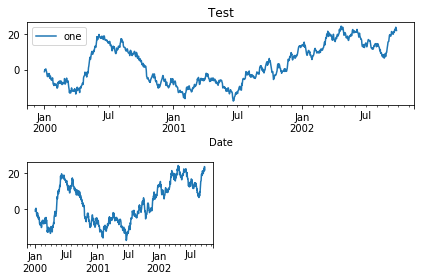

In [7]:
ax1 = plt.subplot(2,1,1) #top
numseries.plot(ax = ax1)
plt.legend(["one"])
plt.title("Test")
plt.xlabel("Date")
ax3 = plt.subplot(2,2,3) #bottom left
numseries.plot(ax = ax3)

#prevent overlap
plt.tight_layout()

It is also possible to use a grid layout while specifying plots

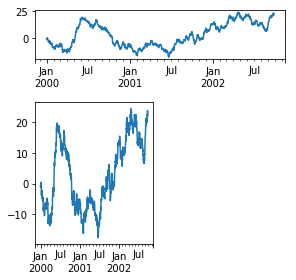

In [6]:
ax = plt.subplot2grid((3,3),(0,0), colspan = 2) #top
numseries.plot(ax = ax)
ax1 = plt.subplot2grid((3,3),(1,0), rowspan = 2) #bottom left
numseries.plot(ax = ax1)

plt.tight_layout()
plt.show()

# Other plots

In [ ]:
df = pd.DataFrame(np.random.randn(1000,4), columns = ['a',2,3,4])
#kind -> type of graph
print(df)
df.plot(subplots=True, layout=(2,2))

df.plot(kind = "scatter", x='a', y=2)

plt.show()

In [ ]:
#Scatter plot
ax = plt.subplot(2,1,1)
df.plot(kind = "scatter", x='a', y=2, c=3, colormap = "viridis", ax=ax)

#Bar graphs
ax4 = plt.subplot(2,2,4)
df.loc[0].plot(kind = 'bar')

#Histogram
ax3 = plt.subplot(2,2,3)
df.loc[0].plot(kind="hist")

plt.show()

In [ ]:
#3D graph example
#More 3D graph documentation at https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
#ax -> Axes3D object
ax = fig.add_subplot(111, projection = "3d")
#1,2,3 are the column labels
#df[[1]] gets the column labelled 1 as a list. df[1] gets it as a dataframe. 
#Both work in this instance
#s = size of points
ax.scatter(xs = df[['a']], ys = df[[2]], zs = df [[3]], zdir = "z", s = 20)

plt.show()

In [ ]:
X,Y = np.meshgrid(df[['a']],df[[2]])
def f(x,y,z):
    z1 = np.array([])
    #constructs first row
    z1 = np.append(z1, z[0] * len(x[0])) 
    for i in range(1,len(x)):
        #vstack stacks the array such that it becomes 2-Dimensional and builds down
        z1 = np.vstack([z1, z[i] * len(x[i])])
    return z1

columndf3 = df.iloc[range(len(df[['a']])),df.columns.get_loc(3)]
Z = f(X,Y,columndf3)
ax = plt.figure().add_subplot(111, projection = "3d")
# X and Y are the grid connections in the x-y plane
# E.g. [[3,4],[4,5]] for X and [[4,5],[3,4]] for Y means that 
# point (3,4), (4,5), (4,3), (5,4) form a surface
# Z is the z value for each point in that grid
# All 3 parameters have to be 2D numpy arrays
ax.plot_surface(X,Y,Z)

plt.show()